In [2]:
%load_ext autoreload
%autoreload

import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD, PCA

%matplotlib inline  
plt.rcParams['figure.figsize'] = [10, 8]

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from anomalyzer.config import loader
from anomalyzer.prepare_data import prepare_data

### Load the data

In [3]:
day_of_week='Tuesday'

data_file= loader(day_of_week=day_of_week,data_type='processed',subtype='Normalized')

df=pd.read_pickle(data_file)

### Preparing the Dataset for Dimensionality Reduction

Here we need to separate our class variable, which in our case is "Label" from the rest of the dataset.

Since Linear Discriminant Analysis (LDA) is a supervised form of dimensionality reduction, we will also need to feed labels into it.

For t-SNE, the unlabeled data will be sufficient.

In [4]:
X,y=prepare_data(data=df,class_column='Label',classes='multi')

### 1. LDA based dimensionality reduction

See:https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html#sklearn.discriminant_analysis.LinearDiscriminantAnalysis.fit_transform

In [5]:
lda_reducer = LinearDiscriminantAnalysis(n_components=2)
x_red_lda = lda_reducer.fit_transform(X,y)

C:\Users\emirk\Anaconda3\envs\insight\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


We see above that many of the features are collinear. This is something we have observed in the correlation matrix generated during the exploratory data analysis.

For the time being, we leave it as is.

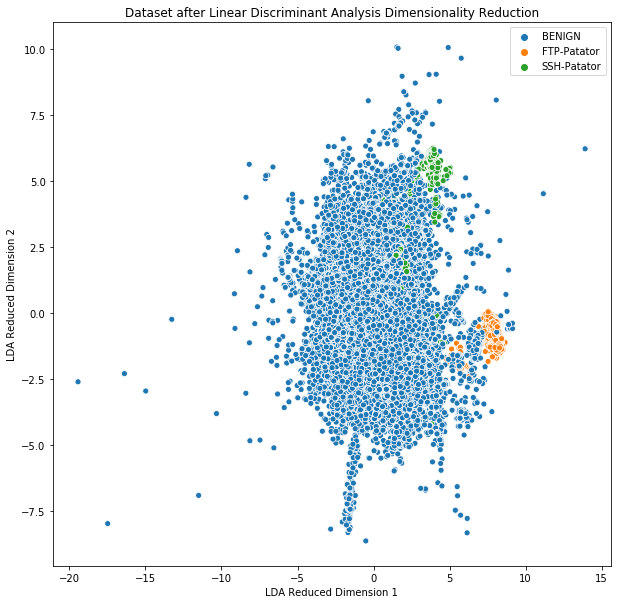

In [12]:
fig=plt.figure(figsize=(10,10))
sns.scatterplot(x_red_lda[:,0],x_red_lda[:,1],hue=y)
plt.xlabel('LDA Reduced Dimension 1')
plt.ylabel('LDA Reduced Dimension 2')
plt.title('Dataset after Linear Discriminant Analysis Dimensionality Reduction')
plt.show()

### 2. t-SNE based dimensionaliy reduction

See: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [7]:
sample_size = X.shape[0]
perp = 30

# X_small = df.loc[:, df.columns != 'Label'].sample(n=sample_size)
# X_small.shape

In [11]:
x_red_tsne = TSNE(n_components=2,perplexity=perp).fit_transform(X)

filename='./tsne_transforms/day_of_week_perplexity_'+str(perp)+'_data_'+str(sample_size)+'.pkl'

with open(filename,'wb') as file:
    pickle.dump(x_red_tsne,file)

In [13]:
filename='./tsne_transforms/day_of_week_perplexity_30_data_445645.pkl'

with open(filename,'rb') as file:
    x_red_tsne=pickle.load(file)

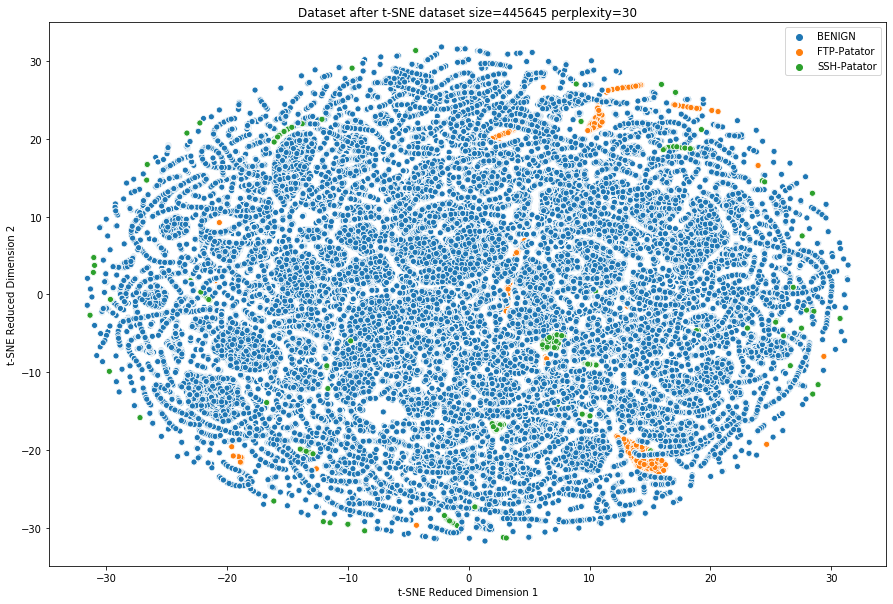

In [14]:
fig=plt.figure(figsize=(15,10))
sns.scatterplot(x_red_tsne[:,0],x_red_tsne[:,1],hue=y)
plt.xlabel('t-SNE Reduced Dimension 1')
plt.ylabel('t-SNE Reduced Dimension 2')
plt.title('Dataset after t-SNE dataset size='+str(sample_size)+' perplexity='+str(perp))
plt.show()

### t-SNE plots saver 

In [20]:
perp_values_to_try=[30]

In [61]:
x_red_tsne=[]
for i, perp in enumerate(perp_values_to_try):
    x_red_tsne.append(TSNE(n_components=2,perplexity=perp).fit_transform(X_small))
    fig=plt.figure(figsize=(15,10))
    sns.scatterplot(x_red_tsne[i][:,0],x_red_tsne[i][:,1],hue=y[0:sample_size])
    plt.xlabel('t-SNE Reduced Dimension 1')
    plt.ylabel('t-SNE Reduced Dimension 2')
    plt.title('Dataset after t-SNE dataset size='+str(sample_size)+' perplexity='+str(perp))
    plt.savefig('./figures/TSNE/'+'sample_size_'+str(sample_size)+'_perplexity_'+str(perp)+'.png')
    plt.close(fig)

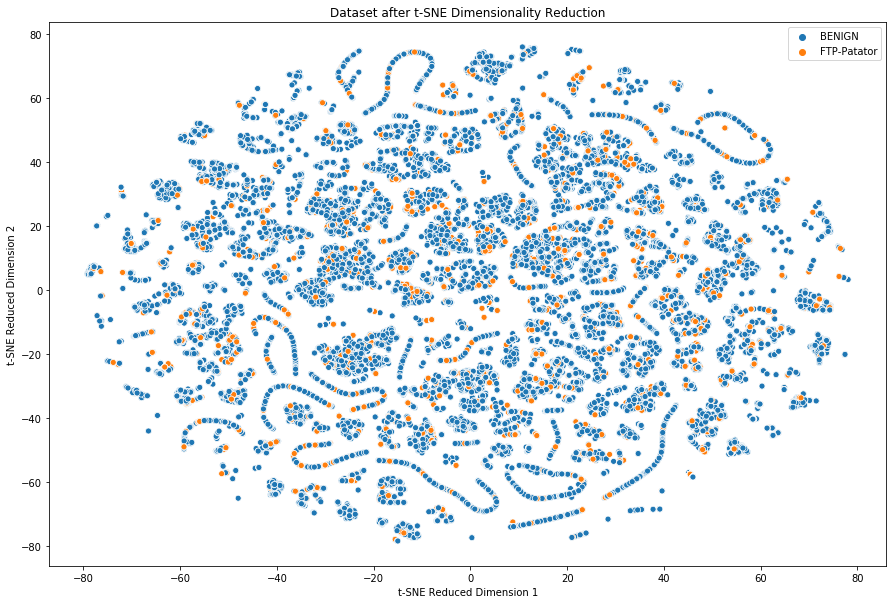

In [46]:
fig=plt.figure(figsize=(15,10))
x_red_tsne=TSNE(n_components=2,perplexity=30).fit_transform(X_small)
sns.scatterplot(x_red_tsne[:,0],x_red_tsne[:,1],hue=y[0:50000])
plt.xlabel('t-SNE Reduced Dimension 1')
plt.ylabel('t-SNE Reduced Dimension 2')
plt.title('Dataset after t-SNE Dimensionality Reduction')
plt.show()

### 3. Singular Value Decomposition based dimensionaliy reduction

See: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html

In [42]:
svd = TruncatedSVD(n_components=2, n_iter=7, random_state=4162)
x_red_svd = svd.fit_transform(X)

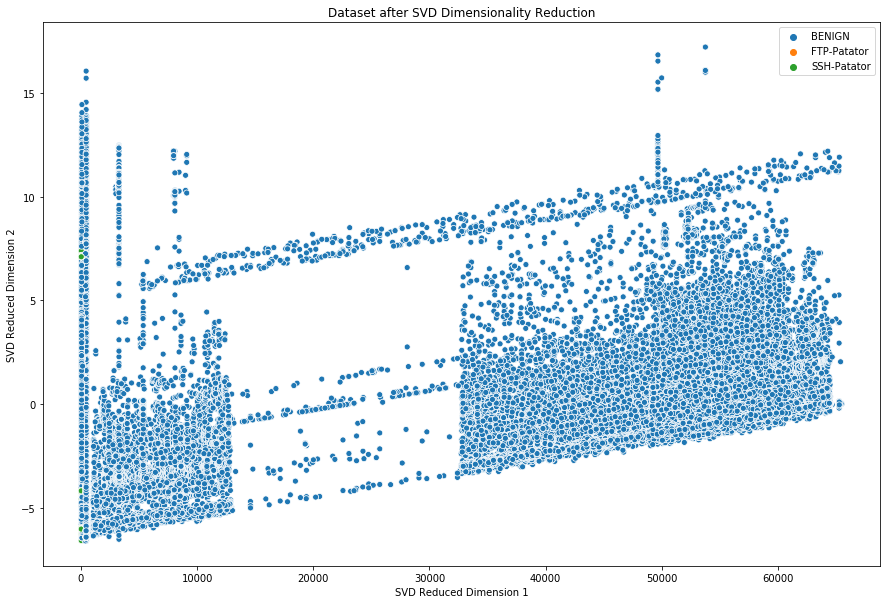

In [43]:
fig=plt.figure(figsize=(15,10))
sns.scatterplot(x_red_svd[:,0],x_red_svd[:,1],hue=y)
plt.xlabel('SVD Reduced Dimension 1')
plt.ylabel('SVD Reduced Dimension 2')
plt.title('Dataset after SVD Dimensionality Reduction')
plt.show()

### 4. Principal Component Analysis (PCA) based dimensionaliy reduction

See: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [44]:
pca_model = PCA(n_components=2, random_state=4162)

In [45]:
x_red_pca = pca_model.fit_transform(X)

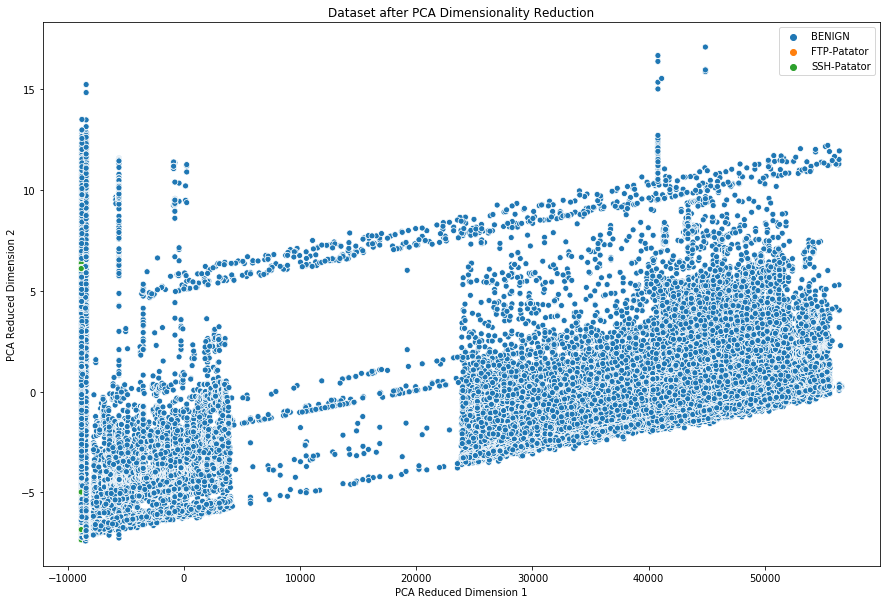

In [46]:
fig=plt.figure(figsize=(15,10))
sns.scatterplot(x_red_pca[:,0],x_red_pca[:,1],hue=y)
plt.xlabel('PCA Reduced Dimension 1')
plt.ylabel('PCA Reduced Dimension 2')
plt.title('Dataset after PCA Dimensionality Reduction')
plt.show()